In [1]:
from sympy import symbols, Symbol, Function, Matrix, Transpose, sqrt
import sympy
import numpy as np
import matplotlib.pyplot as plt

We start with a potential

$$
U(r) = (r - r_0)(a + b r + c r^2 + d r^3)
$$

and impose the following conditions

$$
\begin{aligned}
U(0) & = U_0 & \text{(Barrier height at center)}\\
U'(0) & = 0 & \text{(Center is extremum)} \\
U'(r_0) & = 0 & \text{(Transition path is extremum)} \\
U''(r_0) & = k & \text{(Transition path has width k)}
\end{aligned}
$$

we get

$$
\begin{aligned}
a = - \frac{U_0}{r_0},\ & b = - \frac{U_0}{r_0^2} \\
c = \frac{10 U_0 - k r_0^2}{2 r_0^3},\ & d = \frac{k r_0^2 - 6 U_0}{2 r_0^4}
\end{aligned}
$$


and thus


$$
U(r) = \frac{1}{2 r_0^4} (r - r_0)^2 [ k r^2 r_0^2 - 2 U_0 (r - r_0)(3r + r_0) ]
$$

In order to ensure that the potential has the appropriate sombrero shape, we must have

$$
\begin{aligned}
U''(0) & < 0 & \text{(Center is maximum)}\\
\lim_{r \to \infty} U(r) & = \infty & \text{(Potential is confining)}
\end{aligned}
$$

This imposes the following condition on the curvature of the transition path

$$
\frac{6 U_0}{r_0^2} \leq k \leq \frac{12 U_0}{r_0^2} \quad (1)
$$

For $k > \frac{12 U_0}{r_0^2}$ the central extremum becomes a minimum. For $k < \frac{6 U_0}{r_0^2}$, a second maximum emerges after $r_0$, meaning that $U(r) \to -\infty$ as $r \to \infty$.

In other words we must have

$$
k(\theta) = \frac{6 U_0}{r_0^2} (1 + 2 h( \theta ) )
$$

where $0 \leq h(\theta) \leq 1$.

We set

$$
h(\theta) = \frac{1}{4}( \xi_2 + \xi_1 + (\xi_2 - \xi_1) \sin(\theta) )
$$

such that $h(-\pi/2) = \xi_1$ and $h(\pi/2) = \xi_2$, and thus $k(-\pi/2) = \frac{6 U_0}{r_0^2} (1 + \xi_1)$ and $k(\pi/2) = \frac{6 U_0}{r_0^2} (1 + \xi_2)$.

Finally, we have $\theta = \text{atan2}(x, y)$, and so $\sin(\theta) = \frac{y}{r}$. The final expression for $k$ is

$$
k = \frac{3 U_0}{r_0^2} \left( 2 + \xi_+ + \xi_- \frac{y}{r} \right)
$$

where $\xi_\pm = \xi_2 \pm \xi_1$.

In [2]:
r = Symbol('r')
U0 = Symbol('U0')
r0 = Symbol('r0')
k = Symbol('k')
r1 = (r0/2) * (k*r0**2 - 12*U0) / (k*r0**2 - 6*U0)

abs_r = sqrt(r**2)
U_radial = (1 / (2*r0**4))*(abs_r - r0)**2 * (k*abs_r**2*r0**2 - 2*U0*(abs_r-r0)*(3*abs_r + r0))
dU_radial = U_radial.diff(r).simplify()
ddU_radial = U_radial.diff(r, 2).simplify()
dddU_radial = U_radial.diff(r, 3).simplify()

### Plot radial potential

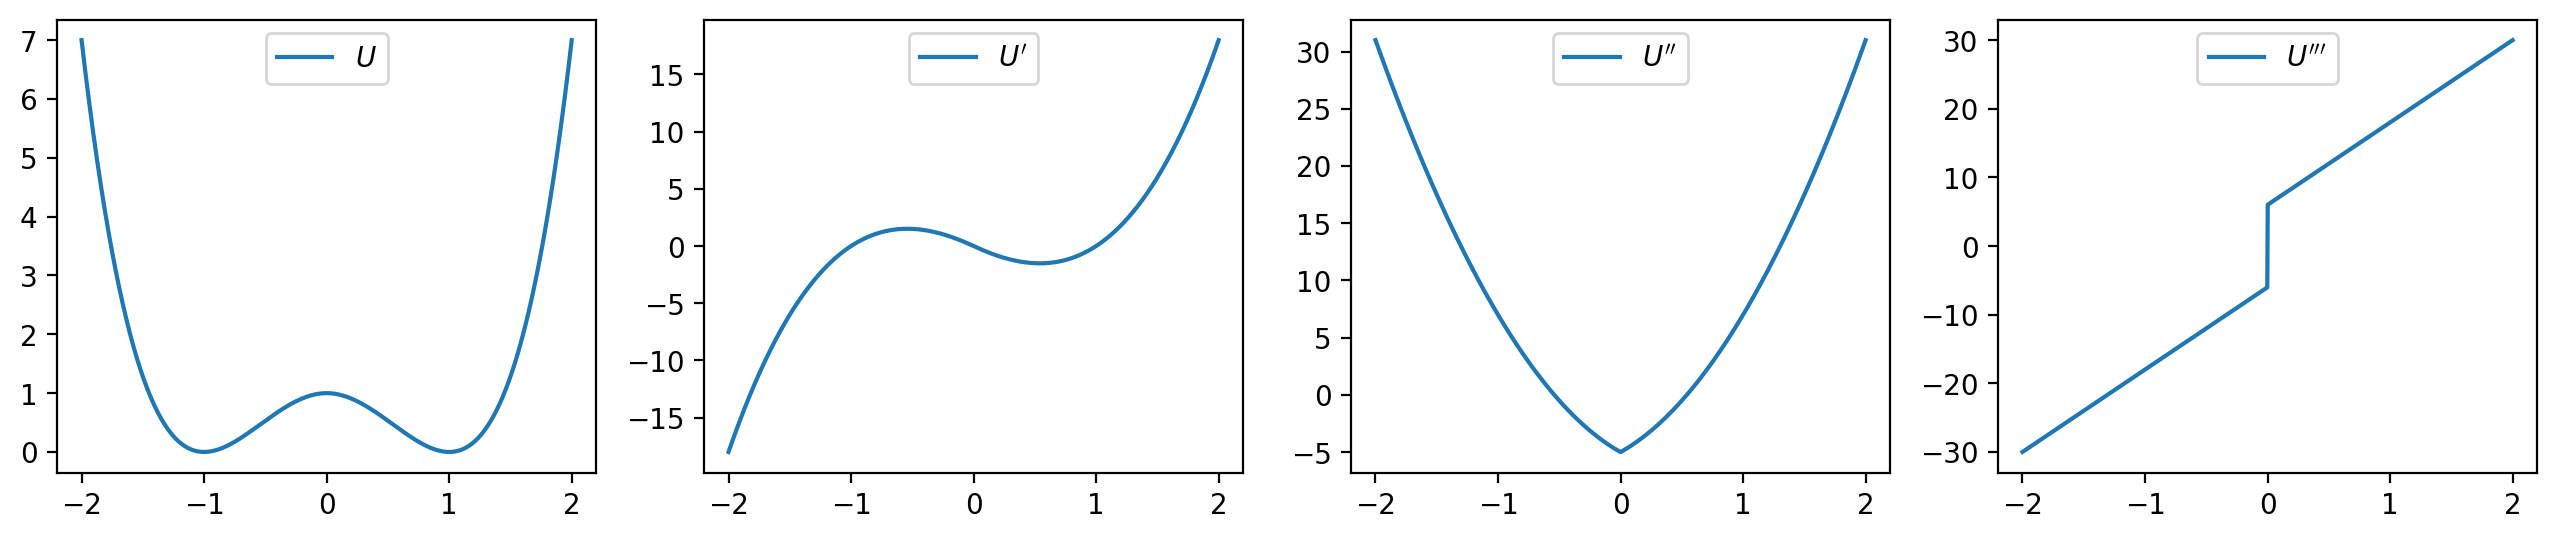

In [3]:
_U0 = 1
_r0 = 1
_k = 7*_U0/_r0**2

rs = np.linspace(-2, 2, 1000)

Us = sympy.lambdify([r, U0, r0, k], U_radial)(rs, _U0, _r0, _k)
dUs = sympy.lambdify([r, U0, r0, k], dU_radial)(rs, _U0, _r0, _k)
ddUs = sympy.lambdify([r, U0, r0, k], ddU_radial)(rs, _U0, _r0, _k)
dddUs = sympy.lambdify([r, U0, r0, k], dddU_radial)(rs, _U0, _r0, _k)

fig, ax = plt.subplots(1, 4, figsize=(16, 3), dpi=200)
ax[0].plot(rs, Us, label="$U$"); ax[0].legend(loc="upper center")
ax[1].plot(rs, dUs, label="$U'$"); ax[1].legend(loc="upper center")
ax[2].plot(rs, ddUs, label="$U''$"); ax[2].legend(loc="upper center")
ax[3].plot(rs, dddUs, label="$U'''$"); ax[3].legend(loc="upper center")
plt.show()

### Non-equilibrium force

In [19]:
x = Symbol('x')
y = Symbol('y')
eta = Symbol('eta')
theta = Symbol('theta')

Fneq = Matrix([0, 0])

Fneq[0] = -sympy.cos( sympy.atan2(x, y) )
Fneq[1] = sympy.sin( sympy.atan2(x, y) )
Fneq[0] = -y
Fneq[1] = x
Fneq *= eta

Fneq_r = sympy.exp(-theta*( sqrt(x**2 + y**2) - r0 )**2)
#Fneq[0] = -sympy.cos( sympy.atan2(x, y) )
#Fneq[1] = sympy.sin( sympy.atan2(x, y) )
Fneq[0] = -y
Fneq[1] = x

Fneq[0] = -sympy.cos( sympy.atan2(x, y) )
Fneq[1] = sympy.sin( sympy.atan2(x, y) )
Fneq *= eta * Fneq_r

Fneq

Matrix([
[-eta*y*exp(-theta*(-r0 + sqrt(x**2 + y**2))**2)/sqrt(x**2 + y**2)],
[ eta*x*exp(-theta*(-r0 + sqrt(x**2 + y**2))**2)/sqrt(x**2 + y**2)]])

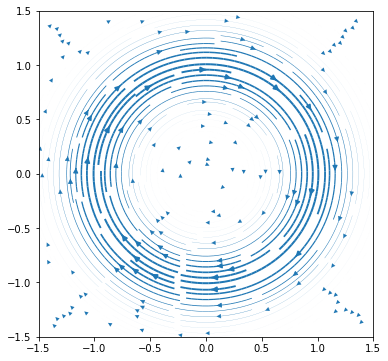

In [17]:
xlim = (-1.5, 1.5)
ylim = (-1.5, 1.5)

_r0 = 1
_eta = 5
_theta = 20

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

Fneq_x_func = sympy.lambdify([x, y, r0, eta, theta], Fneq[0])
Fneq_y_func = sympy.lambdify([x, y, r0, eta, theta], Fneq[1])

xs = np.linspace(xlim[0], xlim[1], 400)
ys = np.linspace(ylim[0], ylim[1], 400)
X, Y = np.meshgrid(xs,  ys)
U, V = Fneq_x_func(X, Y, _r0, _eta, _theta), Fneq_y_func(X, Y, _r0, _eta, _theta)
speed = np.sqrt(U**2 + V**2)
lw = 2*speed / speed.max()

ax.streamplot(X, Y, U, V, density=[2, 2], linewidth=lw)
plt.show()

### Plot 2D potential

In [6]:
x = Symbol('x')
y = Symbol('y')
r = Function('r')(x,y)
xip = Symbol('xi_p')
xim = Symbol('xi_m')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))

Feq = -Matrix([U.diff(x), U.diff(y)])
F = Feq + Fneq
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()

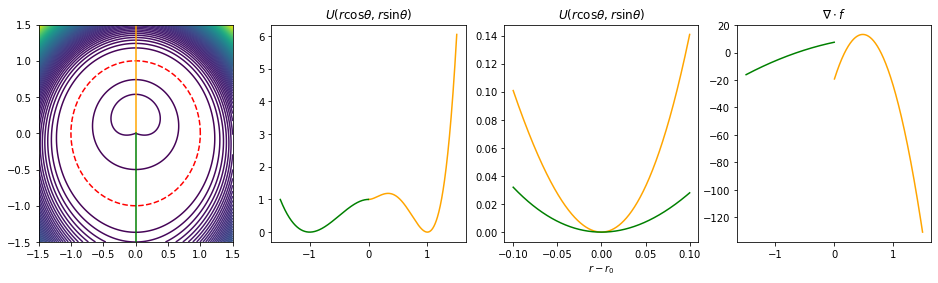

In [7]:
_theta = 1*(np.pi/2)

_U0 = 1
_r0 = 1
_xi1 = 0
_xi2 = 3
_xip = _xi2 + _xi1
_xim = _xi2 - _xi1

xlim = (-1.5, 1.5)
ylim = (-1.5, 1.5)
rlim = (-1.5, 1.5)
cbr = 0.1

xs = np.linspace(xlim[0], xlim[1], 400)
ys = np.linspace(ylim[0], ylim[1], 400)
X, Y = np.meshgrid(xs,  ys)
U_xy = U.subs(r, sqrt(x**2 + y**2)).simplify()
divF_xy = divF.subs(r, sqrt(x**2 + y**2)).simplify()
U_func = sympy.lambdify([x, y, U0, r0, xip, xim], U_xy)
divF_func = sympy.lambdify([x, y, U0, r0, xip, xim], divF_xy)
Z = U_func(X, Y, _U0, _r0, _xip, _xim)

zero_path_x, zero_path_y = _r0*np.cos(np.linspace(0, 2*np.pi, 500)), _r0*np.sin(np.linspace(0, 2*np.pi, 500))

line_r = np.linspace(-2, 2, 1000)
line_x = np.cos(_theta) * line_r
line_y = np.sin(_theta) * line_r
U_line = U_func(line_x, line_y, _U0, _r0, _xip, _xim)
divF_line = divF_func(line_x, line_y, _U0, _r0, _xip, _xim)

narrow_cbr_x, narrow_cbr_y = np.cos(_theta)*np.linspace(_r0-cbr, _r0+cbr, 1000), np.sin(_theta)*np.linspace(_r0-cbr, _r0+cbr, 1000)
narrow_cbr_r = np.sqrt(narrow_cbr_x**2 + narrow_cbr_y**2)
broad_cbr_x, broad_cbr_y = np.cos(_theta)*np.linspace(-_r0-cbr, -_r0+cbr, 1000), np.sin(_theta)*np.linspace(-_r0-cbr, -_r0+cbr, 1000)
broad_cbr_r = -np.sqrt(broad_cbr_x**2 + broad_cbr_y**2)

U_narrow_cbr = U_func(narrow_cbr_x, narrow_cbr_y, _U0, _r0, _xip, _xim)
U_broad_cbr = U_func(broad_cbr_x, broad_cbr_y, _U0, _r0, _xip, _xim)

fig, axes = plt.subplots(1, 4, figsize=(16,4))
axes = axes.flatten()

axes[0].contour(X, Y, Z, levels=100)
axes[0].plot(zero_path_x, zero_path_y, "r--")
mask = (line_r >= 0) * (line_r <= rlim[1])
axes[0].plot(line_x[mask], line_y[mask], "orange")
mask = (line_r <= 0) * (line_r >= rlim[0])
axes[0].plot(line_x[mask], line_y[mask], "green")

mask = (line_r >= 0) * (line_r <= rlim[1])
axes[1].plot(line_r[mask], U_line[mask], "orange")
mask = (line_r <= 0) * (line_r >= rlim[0])
axes[1].plot(line_r[mask], U_line[mask], "green")

axes[2].plot(narrow_cbr_r - _r0, U_narrow_cbr, "orange")
axes[2].plot(broad_cbr_r + _r0, U_broad_cbr, "green")

mask = (line_r >= 0) * (line_r <= rlim[1])
axes[3].plot(line_r[mask], divF_line[mask], "orange")
mask = (line_r <= 0) * (line_r >= rlim[0])
axes[3].plot(line_r[mask], divF_line[mask], "green")

axes[1].set_title(r'$U(r \cos \theta, r \sin \theta)$')
axes[2].set_title(r'$U(r \cos \theta, r \sin \theta)$')
axes[2].set_xlabel(r'$r-r_0$')
axes[3].set_title(r'$\nabla \cdot f$')

axes[0].set_xlim(xlim[0], xlim[1])
axes[0].set_ylim(ylim[0], ylim[1])

plt.show()

### Streamplot

In [8]:
x = Symbol('x')
y = Symbol('y')
r = Function('r')(x,y)
xip = Symbol('xi_p')
xim = Symbol('xi_m')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))

Feq = -Matrix([U.diff(x), U.diff(y)])
F = Feq + Fneq
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()

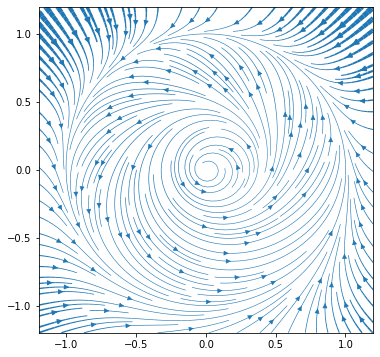

In [9]:
xlim = (-1.2, 1.2)
ylim = (-1.2, 1.2)

_U0 = 1
_r0 = 1
_xi1 = 0
_xi2 = 5
_xip = _xi2 + _xi1
_xim = _xi2 - _xi1
_eta = 5
_theta = 0

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

F_xy = F.subs(r, sqrt(x**2 + y**2))

F_x_func = sympy.lambdify([x, y, U0, r0, xip, xim, eta, theta], F_xy[0])
F_y_func = sympy.lambdify([x, y, U0, r0, xip, xim, eta, theta], F_xy[1])

xs = np.linspace(xlim[0], xlim[1], 400)
ys = np.linspace(ylim[0], ylim[1], 400)
X, Y = np.meshgrid(xs,  ys)
U, V = F_x_func(X, Y, _U0, _r0, _xip, _xim, _eta, _theta), F_y_func(X, Y, _U0, _r0, _xip, _xim, _eta, _theta)
speed = np.sqrt(U**2 + V**2)
lw = 6*speed / speed.max()+0.2

ax.streamplot(X, Y, U, V, density=[2, 2], linewidth=lw)
plt.show()

### Generate force functions

In [10]:
x = Symbol('x')
y = Symbol('y')
r = Function('r')(x,y)
xip = Symbol('xip')
xim = Symbol('xim')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))

Feq = -Matrix([U.diff(x), U.diff(y)])
F = Feq + Fneq
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)

F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()

U = U.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
F = F.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
divF = divF.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))

In [11]:
from sympy.printing.pycode import NumPyPrinter

py_U = NumPyPrinter().doprint(U).replace("numpy", "np")
py_Fx = NumPyPrinter().doprint(F[0]).replace("numpy", "np")
py_Fy = NumPyPrinter().doprint(F[1]).replace("numpy", "np")
py_div_F = NumPyPrinter().doprint(divF).replace("numpy", "np")

In [12]:
print(("""
def Upot(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    return %s
def force_func(path):
    x, y = path[:, 0], path[:, 1]
    f = np.zeros(path.shape) 
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    f[:,0] = %s
    f[:,1] = %s
    div_f = %s
    return f, div_f
def force_vec(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    fx = %s
    fy = %s
    return fx, fy
def divf(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    _divf = %s
    return _divf
""" % (py_U, py_Fx, py_Fy, py_div_F, py_Fx, py_Fy, py_div_F)).strip())

def Upot(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    return (1/2)*(r - r0)**2*(3*U0*r2*(xip + 2 + xim*y/r) - 2*U0*(r - r0)*(3*r + r0))/r0**4
def force_func(path):
    x, y = path[:, 0], path[:, 1]
    f = np.zeros(path.shape) 
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    f[:,0] = 9*U0*r*x*xip/r0**3 - 6*U0*r*x/r0**3 - 9/2*U0*r*x*xim*y/r0**4 - 3*U0*x*xip/r0**2 + 6*U0*x/r0**2 + 6*U0*x*xim*y/r0**3 - 6*U0*r2*x*xip/r0**4 - 3/2*U0*x*xim*y/(r*r0**2) - eta*y*np.exp(-theta*(r0 - np.sqrt(x**2 + y**2))**2)/np.sqrt(x**2 + y**2)
    f[:,1] = (U0*y*(-r + r0)*np.sqrt(x**2 + y**2)*(3*r*(r*(xip + 2) + xim*y) + 2*(-r + r0)*(3*r + r0))*np.exp(theta*(r0 - np.sqrt(x**2 + y**2))**2) - 1/2*U0*(-r + r0)**2*np.sqrt(x**2 + y**2)*(-3*xim*(-r2 + y**2) + 2*y*(3*r*(xip + 2) - 6*r + 2*r0 + 3*xim*y))*np.exp(theta*(r0 - np.sqrt(x**2 + y**2))**2) + eta*r*r0**4*x)*np.exp(-theta*(r0 - np.sqrt(x**2 + y**2))**2)/(r*r0**4*np.sqrt(x**2 + y**2))
    div_f = (3/2)*U0*(-8*r**5*xip - 4*r**3*r0**2*xip + 8*r**3*r0**2 + 16*r